# **Stock Price Prediction using LSTM**

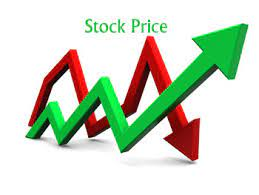

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [ ]:
# importing the dataset
from google.colab import files
files.upload()

Saving TATASTEEL_train.csv to TATASTEEL_train.csv


{'TATASTEEL_train.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-12-23,59.900002,62.419998,59.630001,62.139999,27.017551,122383430\n2020-12-24,62.529999,63.695000,61.924999,62.230000,27.056681,120907400\n2020-12-28,62.825001,63.535000,62.660000,63.264999,27.506683,104805170\n2020-12-29,63.785000,63.965000,62.105000,63.220001,27.487118,104163260\n2020-12-30,63.294998,64.394997,62.404999,64.044998,27.845816,115144280\n2020-12-31,63.654999,65.349998,63.654999,64.364998,27.984947,177130120\n2021-01-01,64.500000,64.970001,64.000000,64.309998,27.961035,84113960\n2021-01-04,64.900002,69.989998,64.644997,69.300003,30.130615,381849550\n2021-01-05,68.699997,69.385002,67.510002,68.055000,29.589304,215452540\n2021-01-06,68.400002,69.665001,67.500000,68.379997,29.730606,196105220\n2021-01-07,69.300003,73.150002,69.169998,72.279999,31.426273,382321940\n2021-01-08,72.699997,72.724998,70.309998,71.315002,31.006704,193293130\n2021-01-11,71.199997,71.199997,68.820000,69.565002,30.245832,1702450

In [ ]:
# reading the dataframe
df = pd.read_csv('TATASTEEL_train.csv')

# sorting the dataframe by date
df.sort_values('Date')

# checking the data
df.head()
df.count()

Date         496
Open         496
High         496
Low          496
Close        496
Adj Close    496
Volume       496
dtype: int64

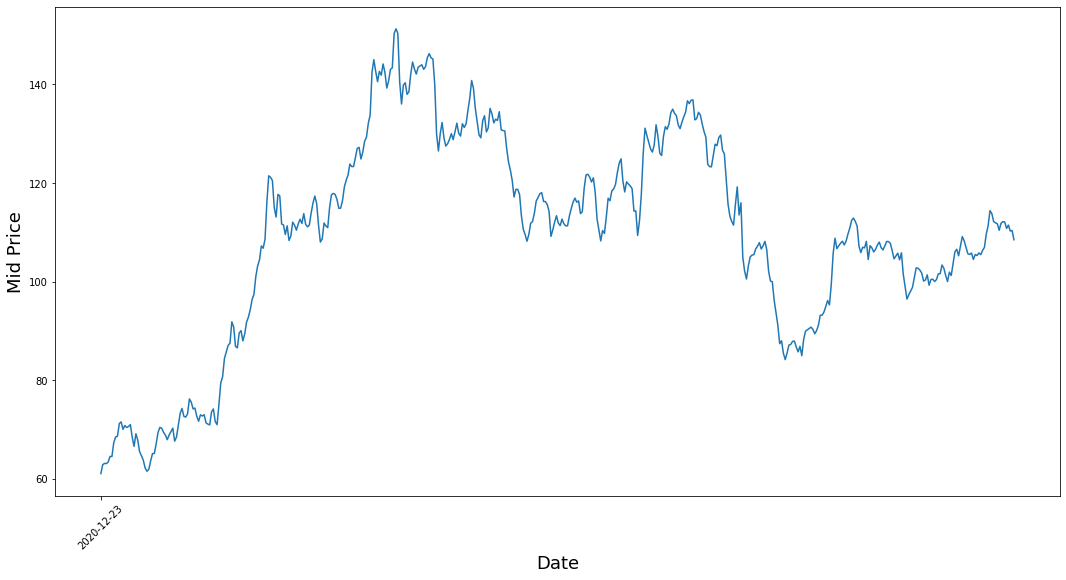

In [ ]:
# performing data visualisation
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]), (df['Low']+df['High'])/2.0)
plt.xticks(range(0, df.shape[0], 500), df['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.show()

In [ ]:
# defining the training set
training_set = df.iloc[:, 1:2].values

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.        ],
       [0.0285745 ],
       [0.03177965],
       [0.04220989],
       [0.03688609],
       [0.04079745],
       [0.04997825],
       [0.05432421],
       [0.09561055],
       [0.09235115],
       [0.10212952],
       [0.13906992],
       [0.12277265],
       [0.10430246],
       [0.11131025],
       [0.12059972],
       [0.12277265],
       [0.11842678],
       [0.07931329],
       [0.099033  ],
       [0.0999565 ],
       [0.07714035],
       [0.05649713],
       [0.05638846],
       [0.02064317],
       [0.03373532],
       [0.00641026],
       [0.04780531],
       [0.04986958],
       [0.05975663],
       [0.06290743],
       [0.10321599],
       [0.11679704],
       [0.12059972],
       [0.09626249],
       [0.10430246],
       [0.09571922],
       [0.07947625],
       [0.10718163],
       [0.10973488],
       [0.10538892],
       [0.08029117],
       [0.09843543],
       [0.14776182],
       [0.14797909],
       [0.13689698],
       [0.13581052],
       [0.142

In [ ]:
x_train = []
y_train = []
for i in range(15, 496):
  x_train.append(training_set_scaled[i-15:i, 0])
  y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.        , 0.0285745 , 0.03177965, ..., 0.12277265, 0.10430246,
        0.11131025],
       [0.0285745 , 0.03177965, 0.04220989, ..., 0.10430246, 0.11131025,
        0.12059972],
       [0.03177965, 0.04220989, 0.03688609, ..., 0.11131025, 0.12059972,
        0.12277265],
       ...,
       [0.49000432, 0.50195563, 0.5302042 , ..., 0.57312038, 0.5481312 ,
        0.55573665],
       [0.50195563, 0.5302042 , 0.55302044, ..., 0.5481312 , 0.55573665,
        0.55682312],
       [0.5302042 , 0.55302044, 0.58018254, ..., 0.55573665, 0.55682312,
        0.56388528]])

In [ ]:
# reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.        ],
        [0.0285745 ],
        [0.03177965],
        ...,
        [0.12277265],
        [0.10430246],
        [0.11131025]],

       [[0.0285745 ],
        [0.03177965],
        [0.04220989],
        ...,
        [0.10430246],
        [0.11131025],
        [0.12059972]],

       [[0.03177965],
        [0.04220989],
        [0.03688609],
        ...,
        [0.11131025],
        [0.12059972],
        [0.12277265]],

       ...,

       [[0.49000432],
        [0.50195563],
        [0.5302042 ],
        ...,
        [0.57312038],
        [0.5481312 ],
        [0.55573665]],

       [[0.50195563],
        [0.5302042 ],
        [0.55302044],
        ...,
        [0.5481312 ],
        [0.55573665],
        [0.55682312]],

       [[0.5302042 ],
        [0.55302044],
        [0.58018254],
        ...,
        [0.55573665],
        [0.55682312],
        [0.56388528]]])

# **Importing Libraries**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# initialising the recurrent neural network
regressor = Sequential()

# adding first LSTM layer and dropouts
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# adding second LSTM layer and dropouts
regressor.add(LSTM(units=50, return_sequences=True, ))
regressor.add(Dropout(0.2))

In [ ]:
# adding third LSTM layer and dropouts
regressor.add(LSTM(units=50, return_sequences=True, ))
regressor.add(Dropout(0.2))

In [ ]:
# adding fourth LSTM layer and dropouts
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [ ]:
# adding output layer
regressor.add(Dense(units=1))

In [ ]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# fitting the RNN to training data set
regressor.fit(x_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
25/25 [==============================] - 6s 20ms/step - loss: 0.0871
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0195
Epoch 3/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0119
Epoch 4/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0115
Epoch 5/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0118
Epoch 6/100
25/25 [==============================] - 1s 23ms/step - loss: 0.0129
Epoch 7/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0116
Epoch 8/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0103
Epoch 9/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0096
Epoch 10/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0106
Epoch 11/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0109
Epoch 12/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0093
Epoch 13/100
25/25 [=====

# **Predicting the resultst**

In [ ]:
# uploading test dataset
files.upload()

Saving TATASTEEL_test.csv to TATASTEEL_test.csv


{'TATASTEEL_test.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2019-12-02,42.494999,42.695000,41.900002,42.084999,17.835632,83371710\n2019-12-03,41.799999,41.855000,39.639999,39.965000,16.937176,168706560\n2019-12-04,39.279999,41.145000,38.900002,40.930000,17.346144,261132490\n2019-12-05,41.105000,41.185001,39.709999,39.980000,16.943533,111108840\n2019-12-06,40.145000,40.750000,39.384998,40.325001,17.089745,169310820\n2019-12-09,40.299999,41.180000,40.195000,40.669998,17.235954,123184520\n2019-12-10,40.500000,40.959999,40.020000,40.205002,17.038889,93495850\n2019-12-11,40.240002,40.820000,40.035000,40.555000,17.187218,82278630\n2019-12-12,40.830002,42.090000,40.680000,41.869999,17.744514,149846710\n2019-12-13,43.025002,43.459999,42.345001,42.840000,18.155602,216281830\n2019-12-16,43.200001,43.200001,42.014999,42.099998,17.841988,95658310\n2019-12-17,42.360001,44.189999,42.305000,43.939999,18.621780,307577380\n2019-12-18,43.939999,45.480000,43.605000,44.474998,18.848513,400283980\n

In [ ]:
# getting stock price
dataset_test = pd.read_csv('TATASTEEL_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,42.494999,42.695000,41.900002,42.084999,17.835632,83371710
1,2019-12-03,41.799999,41.855000,39.639999,39.965000,16.937176,168706560
2,2019-12-04,39.279999,41.145000,38.900002,40.930000,17.346144,261132490
3,2019-12-05,41.105000,41.185001,39.709999,39.980000,16.943533,111108840
4,2019-12-06,40.145000,40.750000,39.384998,40.325001,17.089745,169310820
5,2019-12-09,40.299999,41.180000,40.195000,40.669998,17.235954,123184520
6,2019-12-10,40.500000,40.959999,40.020000,40.205002,17.038889,93495850
7,2019-12-11,40.240002,40.820000,40.035000,40.555000,17.187218,82278630
8,2019-12-12,40.830002,42.090000,40.680000,41.869999,17.744514,149846710
9,2019-12-13,43.025002,43.459999,42.345001,42.840000,18.155602,216281830


In [ ]:
real_stock_price

array([[42.494999],
       [41.799999],
       [39.279999],
       [41.105   ],
       [40.145   ],
       [40.299999],
       [40.5     ],
       [40.240002],
       [40.830002],
       [43.025002],
       [43.200001],
       [42.360001],
       [43.939999],
       [44.      ],
       [44.599998],
       [46.099998],
       [46.220001],
       [46.299999],
       [46.924999],
       [47.009998]])

In [ ]:
# getting predicted price of stock
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 15:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
x_test = []
for i in range(15, 35):
  x_test.append(inputs[i-15:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


# **Visualising the predictions and real price**

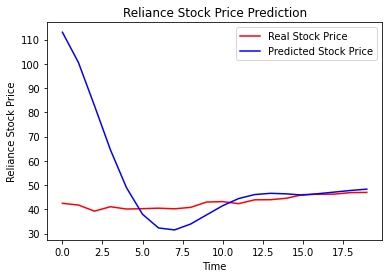

In [ ]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()